# Pymaceuticals Inc.
---

### Analysis
Pymaceuticals Inc. is testing 10 possible medications for cancer. The study involved 248 mice as the subjects. This study is the monitoring of these mice over time. 

Capomulin and Romicane were the most effective drugs. These 2 treatments had the lowest average tumor mass by the end of the study. Additionally, they demonstrated the highest survival rate of 230 and 228 days respectively. 

Comparing Capomulin and Romicane with Infubinol and Ceftamin, it shows that the mass volume is significantly smaller. 

The study reveals that for a single mouse (l509), the treatment shrank the tumor mass for 15 days following 20 days of administration. The mass then went into remission, but resumed growing at a low rate for the final 10 days. 

There is a correlation of 0.84 between weight and tumor size. The model fits the data 70% (R-square). 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# # Read mouse data 
mouse_metadata_df = pd.read_csv("data/Mouse_metadata.csv")
print(mouse_metadata_df)
print()
print(mouse_metadata_df.info())
mouse_metadata_df.head()

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Se

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
# Read study results
study_results_df = pd.read_csv("data/Study_results.csv")
print(study_results_df)
print()
print(study_results_df.info())
study_results_df.head()

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single DataFrame
df = pd.merge(study_results_df, mouse_metadata_df, on=["Mouse ID"])

# Display the data table for preview
print(df.shape)
print(df.info())
df.head()

(1893, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB
None


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [5]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# dups_df = df.loc[df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
dups_df = df.loc[df["Mouse ID"] == "g989"]
dups_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dups_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep=False)
clean_df = df.loc[df["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summ_mean   = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summ_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summ_var    = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summ_std    = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summ_sem    = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summ1_df = pd.DataFrame({"Mean Tumor Volume": summ_mean,
                         "Median Tumor Volume": summ_median,
                         "Tumor Volume Variance": summ_var,
                         "Tumor Volume Std. Dev.": 	summ_std,
                         "Tumor Volume Std. Err.": summ_sem
                        })
summ1_df.head(20)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summ2_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
summ2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
clean_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False).reset_index()

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,148


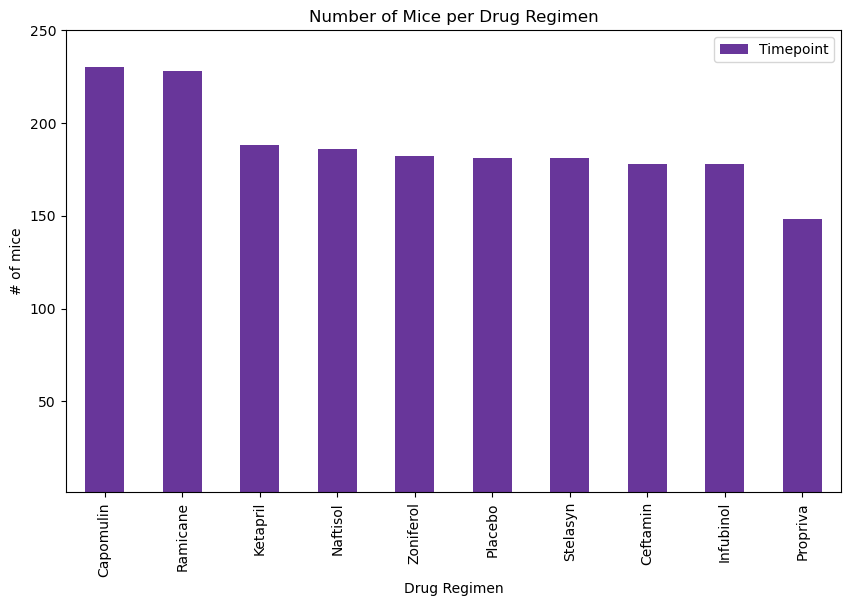

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# 1. Get the data
num_mice_timepoint_df = clean_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False).reset_index()

# 2. Create the plot
num_mice_timepoint_df.plot(kind="bar", x="Drug Regimen", y="Timepoint", color="#68369A", figsize=(10,6), 
                           title="Number of Mice per Drug Regimen", ylabel="# of mice", ylim=(1,250))

# 3. Save/Show the plot
plt.show()

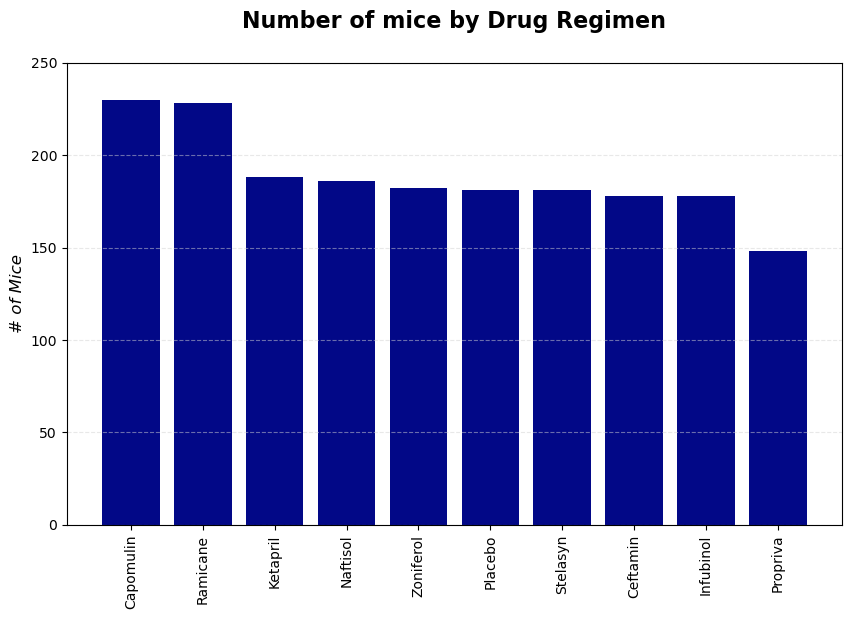

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# 1. Get the data
x_axis = num_mice_timepoint_df["Drug Regimen"]
y_axis = num_mice_timepoint_df["Timepoint"]

# 2. Create the Canvas 
plt.figure(figsize=(10,6))

# 3. Create the plot
plt.bar(x_axis, y_axis, color="#020887")

# 4. Customize the plot
plt.title("Number of mice by Drug Regimen\n", fontsize=16, fontweight="bold")
plt.ylabel("# of Mice", fontsize=12, fontstyle="italic")
plt.xticks(rotation="vertical")
plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=0.5)

plt.ylim(0, 250)

# 5. Save/Show the plot
plt.show()

In [15]:
clean_df["Sex"].value_counts() #.reset_index()

Sex
Male      958
Female    922
Name: count, dtype: int64

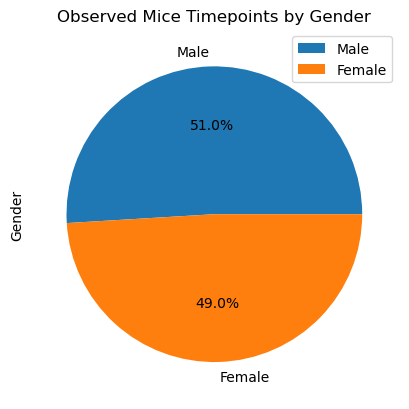

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# 1. Get the data
mice_gender_df = clean_df["Sex"].value_counts().reset_index()
mice_gender_df.columns = ["Gender", "Count of Gender"]

# # 2. Create the plot
mice_gender_df.plot(kind="pie", x="Gender", y="Count of Gender", labels=mice_gender_df["Gender"],  
                    autopct="%1.1f%%", title="Observed Mice Timepoints by Gender", ylabel="Gender")

# 3. Save/Show the plot
plt.show()

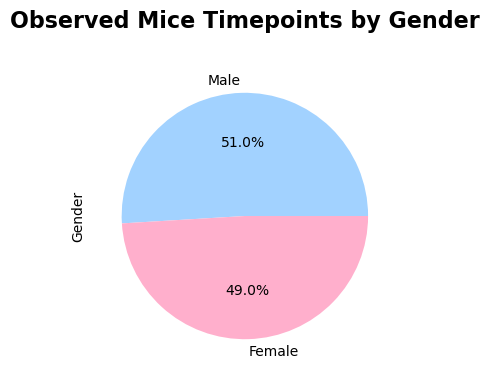

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# 1. Get the data
gender_count = mice_gender_df["Count of Gender"]
labels = mice_gender_df["Gender"]
colors = ["#a2d2ff", "#ffafcc"]

# 2. Make the canvas
plt.figure(figsize=(6,4))

# 3. Make the plot 
plt.pie(gender_count, labels=labels, colors=colors, autopct="%1.1f%%")

# 4. Customizations (Color Males = #a2d2ff, Color Females = #ffafcc)
plt.title("Observed Mice Timepoints by Gender\n", fontweight="bold", fontsize=16)
plt.ylabel("Gender")

# 5. Save/Show
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_lst = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_df = pd.merge(clean_df, max_timepoint_df, on=["Mouse ID", "Timepoint"])
print(combined_df.shape)
print(combined_df.info())
combined_df.head()

(248, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            248 non-null    object 
 1   Timepoint           248 non-null    int64  
 2   Tumor Volume (mm3)  248 non-null    float64
 3   Metastatic Sites    248 non-null    int64  
 4   Drug Regimen        248 non-null    object 
 5   Sex                 248 non-null    object 
 6   Age_months          248 non-null    int64  
 7   Weight (g)          248 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 15.6+ KB
None


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_lst # Already done on the cell above

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_lst = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimen_lst:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mask = combined_df['Drug Regimen'] == regimen

    # add subset 
    tumor_vol_data = combined_df.loc[mask, "Tumor Volume (mm3)"]
    tumor_vol_data_lst.append(tumor_vol_data)
    
    # Determine outliers using upper and lower bounds
    q1 = tumor_vol_data.quantile(0.25)
    q3 = tumor_vol_data.quantile(0.75)
    iqr = q3-q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    mask = (tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)
    outliers = tumor_vol_data.loc[mask]
    print(f"{regimen} potentital outliers: {outliers}")


Capomulin potentital outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potentital outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potentital outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potentital outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [20]:
mask = combined_df["Drug Regimen"].isin(regimen_lst)
short_regimen_df = combined_df.loc[mask]
short_regimen_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
7,u153,0,45.000000,0,Ceftamin,Female,11,25
8,b447,0,45.000000,0,Ceftamin,Male,2,30
10,x226,0,45.000000,0,Ceftamin,Male,23,28
11,t573,0,45.000000,0,Ceftamin,Female,15,27
20,c326,5,36.321346,0,Infubinol,Female,18,25


<Axes: xlabel='Drug Regimen', ylabel='Tumor Volume (mm3)'>

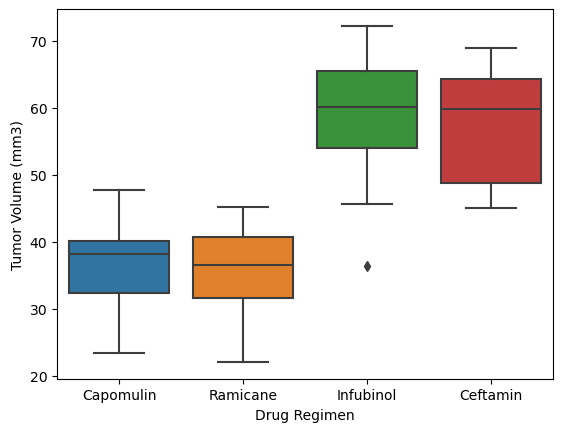

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group using Seaborn
sns.boxplot(data=short_regimen_df, x="Drug Regimen", y="Tumor Volume (mm3)", order=regimen_lst)

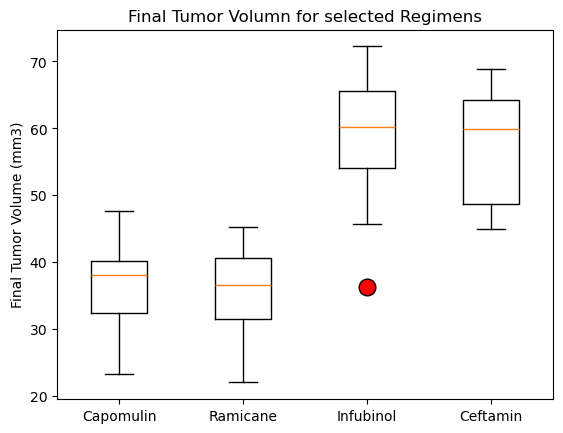

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
outlier_marker = dict(markerfacecolor="red", markersize=12)

plt.boxplot(tumor_vol_data_lst, labels=regimen_lst, flierprops=outlier_marker)
plt.title("Final Tumor Volumn for selected Regimens")
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

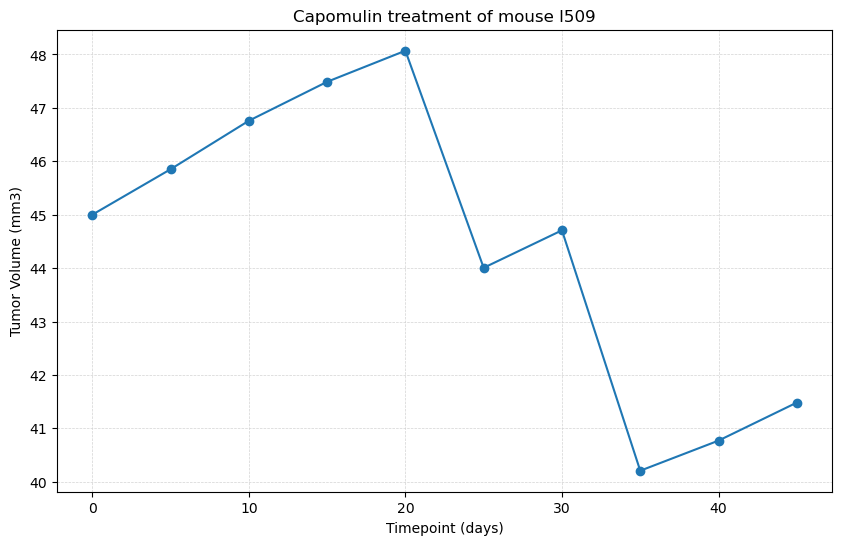

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# 1. Get the data
regimen_choice = "Capomulin"
mouse = "l509"

single_regimen_df = clean_df.loc[clean_df['Drug Regimen'] == regimen_choice]
single_mouse_df = single_regimen_df.loc[single_regimen_df["Mouse ID"] == mouse]

# 2. Make the canvas
plt.figure(figsize=(10,6))

# 3. Make the plot
plt.plot(single_mouse_df["Timepoint"], single_mouse_df["Tumor Volume (mm3)"], marker="o")
plt.title(f"{regimen_choice} treatment of mouse {mouse}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(linestyle="--", linewidth=0.5, color="lightgrey")

# 4. Save/Show the plot
# NOTE: xlim and ylim are not being used in the solution on purpose to allow the plot to adjust to the data based on different regimens and/or mice
plt.show()

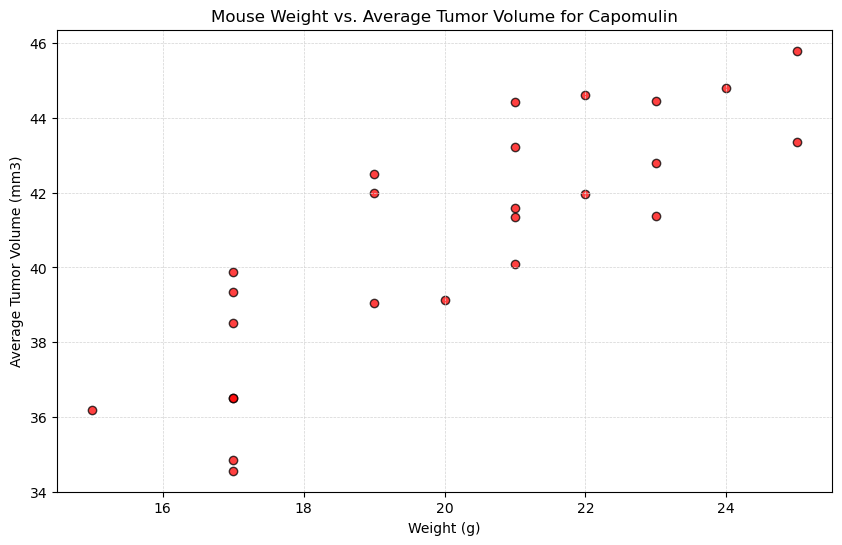

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# 1. Get the data
full_regimen_df = clean_df.loc[clean_df["Drug Regimen"] == regimen_choice]
avg_tumor_vol = full_regimen_df.groupby(["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean().reset_index()

# 2. Make the canvas
plt.figure(figsize=(10,6))

# 3. Make the plot
plt.scatter(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title(f"Mouse Weight vs. Average Tumor Volume for {regimen_choice}")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(linestyle="--", linewidth=0.5, color="lightgrey")

# 4. Save/Show the plot
# NOTE: xlim and ylim are not being used in the solution on purpose to allow the plot to adjust to the data based on different regimen
plt.show()

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# 1. Get the data
#  - Calculate the correlation coefficient
corr = st.pearsonr(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(corr[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


In [26]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"])
regress_values = avg_tumor_vol["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.7088568047708723


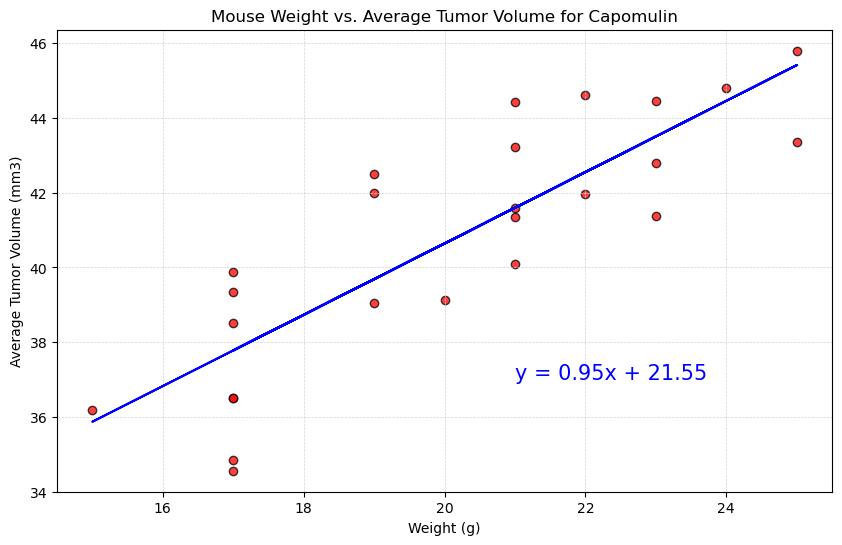

In [27]:
# 2. Make the canvas
plt.figure(figsize=(10,6))

# 3. Make the plot
plt.scatter(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(avg_tumor_vol["Weight (g)"], regress_values, color="blue")
plt.annotate(line_eq,(21,37),fontsize=15,color="blue")
plt.title(f"Mouse Weight vs. Average Tumor Volume for {regimen_choice}")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(linestyle="--", linewidth=0.5, color="lightgrey")

# 4. Save/Show the plot
# NOTE: xlim and ylim are not being used in the solution on purpose to allow the plot to adjust to the data based on different regimen
plt.show()